In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv("../processed_data/companies_feature_engineering.csv")
df.head()

id                name     normalized_name country_code state_code  \
0      c:1            Wetpaint            wetpaint          usa         wa   
1     c:10             Flektor             flektor          usa         ca   
2    c:100               There               there          usa         ca   
3  c:10000             MYWEBBO             mywebbo      unknown    unknown   
4  c:10001  THE Movie Streamer  the movie streamer      unknown    unknown   

          city       region        lat         lng     status  ...  \
0      Seattle      seattle  47.606209 -122.332071  operating  ...   
1  Culver City  los angeles  34.021122 -118.396467   acquired  ...   
2    San Mateo       sf bay  37.562992 -122.325525   acquired  ...   
3      Unknown      unknown        NaN         NaN  operating  ...   
4      Unknown      unknown        NaN         NaN  operating  ...   

  days_since_last_milestone funding_frequency milestone_frequency  \
0                    4427.0          0.826202            1.238765   
1                    6370.0          0.000000            0.000000   
2                    5153.0          0.000000            0.414909   
3                    6264.0          0.000000            0.000000   
4                    6264.0          0.000000            0.000000   

  recently_funded recently_milestone  recently_updated  \
0               0                  0                 0   
1               0                  0                 0   
2               0                  0                 0   
3               0                  0                 0   
4               0                  0                 0   

  business_maturity_score  ecosystem_engagement strategic_positioning  \
0                0.305384              0.504170              1.678724   
1                0.208033              0.401472                   NaN   
2                0.241637              0.402944                   NaN   
3                0.157581              0.400000                   NaN   
4                0.221530              0.400000                   NaN   

   operational_sophistication  
0                         0.8  
1                         0.7  
2                         0.7  
3                         0.7  
4                         0.7  

[5 rows x 116 columns]

In [3]:
# keep risk tiers in right order for all charts
df['risk_tier_label'] = pd.Categorical(df['risk_tier_label'], categories=['low_risk','medium_risk','high_risk'], ordered=True)

# Set category order for funding stages
funding_order = [
    'Pre-seed', 'Seed', 'Early', 'Growth', 'Late',
    'Exit (IPO)', 'Exit (Acquired)', 'Closed'
]
df['funding_stage'] = pd.Categorical(df['funding_stage'], categories=funding_order, ordered=True)

# Risk Tier Distribution

C:\Users\emily\AppData\Local\Temp\ipykernel_19964\4016191801.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='risk_tier_label', data=df, palette="Blues_r")


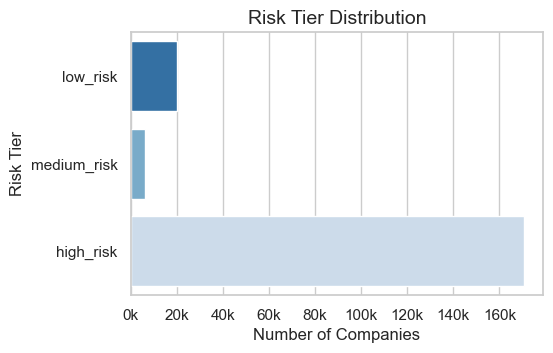

In [4]:
sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.countplot(y='risk_tier_label', data=df, palette="Blues_r")

plt.title("Risk Tier Distribution", fontsize=14)
plt.xlabel("Number of Companies", fontsize=12)
plt.ylabel("Risk Tier", fontsize=12)

# make x-axis labels shorter
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.tight_layout(pad=2.0)
plt.show()

Most companies fall into the high-risk group, while only a small number are medium or low risk. This shows that most startups in the dataset appear financially vulnerable or less established based on our risk scoring

# Company Status Distribution

C:\Users\emily\AppData\Local\Temp\ipykernel_19964\1978677077.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


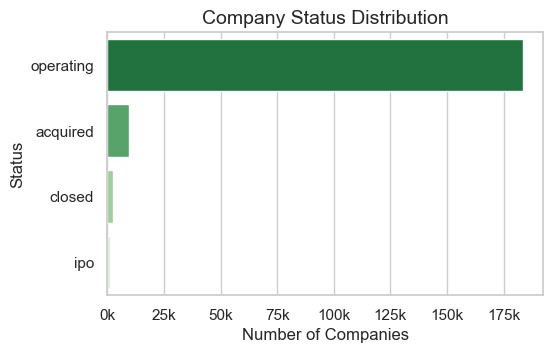

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(
    y='status',
    data=df,
    palette="Greens_r"
)

plt.title("Company Status Distribution", fontsize=14)
plt.xlabel("Number of Companies", fontsize=12)
plt.ylabel("Status", fontsize=12)

# shorten x-axis numbers
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.tight_layout(pad=2.0)
plt.show()


Most companies are still operating, while only a few have been acquired, gone public, or closed. This means most startups in the dataset are still active and haven’t yet reached a final outcome.

# Funding Distribution

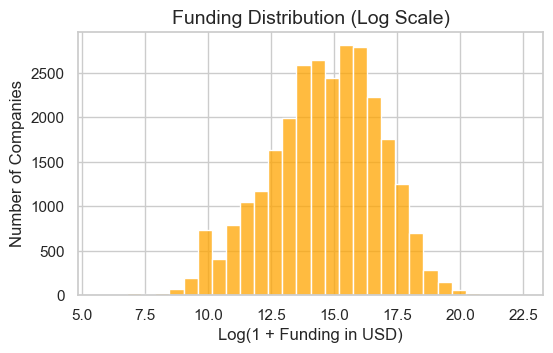

In [6]:
# convert to numeric and remove missing/zero
funding_data = pd.to_numeric(df['funding_total_usd'], errors='coerce')
funding_data = funding_data[funding_data > 0]

# plot histogram
plt.figure(figsize=(6,4))
sns.histplot(np.log1p(funding_data), bins=30, color='orange')

plt.title("Funding Distribution (Log Scale)", fontsize=14)
plt.xlabel("Log(1 + Funding in USD)", fontsize=12)
plt.ylabel("Number of Companies", fontsize=12)

plt.tight_layout(pad=2.0)
plt.show()

Most companies in our dataset raised a medium amount of funding. Only a small number raised very large amounts, which shows that big funding rounds are rare.

# Company Age Distribution

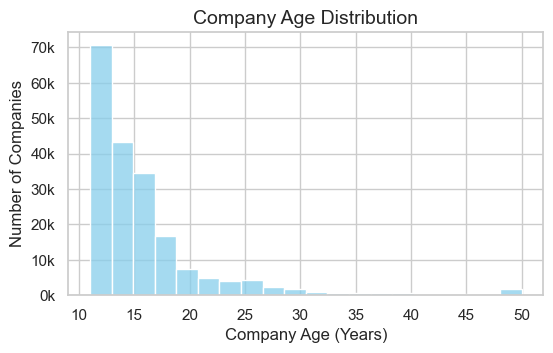

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(df['company_age_years'].dropna(), bins=20, color='skyblue')

plt.title("Company Age Distribution", fontsize=14)
plt.xlabel("Company Age (Years)", fontsize=12)
plt.ylabel("Number of Companies", fontsize=12)

# Shorten the y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y/1000)}k'))

plt.tight_layout(pad=2.0)
plt.show()

Most companies are relatively young. The age distribution is right-skewed, meaning many younger firms and fewer older ones

#Funding by Risk Tier

C:\Users\emily\AppData\Local\Temp\ipykernel_19964\2507990486.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


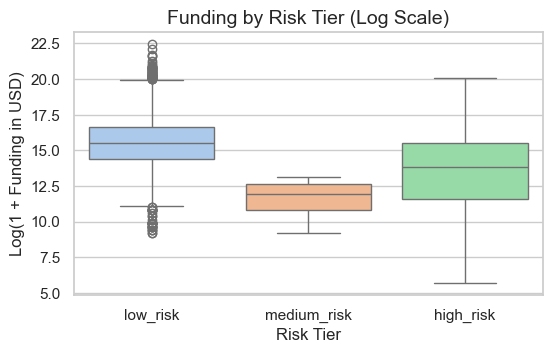

In [8]:
# keep only rows with funding > 0 so the log works
funding_risk = df[df['funding_total_usd'] > 0]

plt.figure(figsize=(6,4))
sns.boxplot(
    x='risk_tier_label',
    y=np.log1p(funding_risk['funding_total_usd']),
    data=funding_risk,
    palette="pastel"
)

plt.title("Funding by Risk Tier (Log Scale)", fontsize=14)
plt.xlabel("Risk Tier", fontsize=12)
plt.ylabel("Log(1 + Funding in USD)", fontsize=12)

plt.tight_layout(pad=2.0)
plt.show()

This chart shows that low-risk companies usually have higher funding, while medium-risk ones have much less. High-risk companies vary more in how much money they have, with some getting very little and a few raising large amounts. Overall, this suggests that companies with more funding tend to be safer, while those with little money are more likely to be risky.

# Risk by Company Age Group

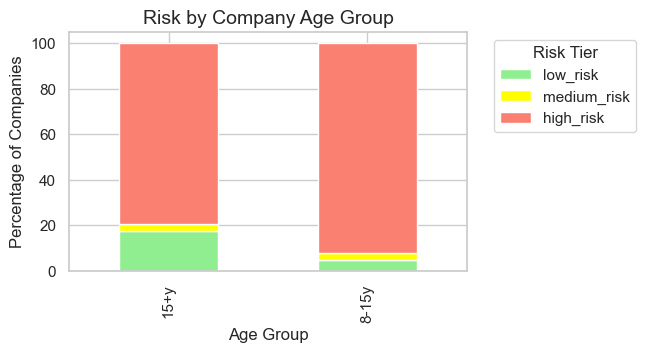

In [9]:
age_risk = pd.crosstab(df['age_group'], df['risk_tier_label'], normalize='index') * 100

# make stacked bar chart
age_risk.plot(kind='bar', stacked=True, figsize=(7,4),
              color=['lightgreen', 'yellow', 'salmon'])

plt.title("Risk by Company Age Group", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Percentage of Companies", fontsize=12)

plt.legend(title="Risk Tier", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(pad=2.0)
plt.show()


Both the 8–15 year and 15+ year companies are mostly high risk, but the 15+ group has a bit more low-risk firms than the 8–15 group. This suggests that while many older companies still face high risk, a few long-standing ones have become more stable over time.

# Top 10 Industries by High-Risk Share

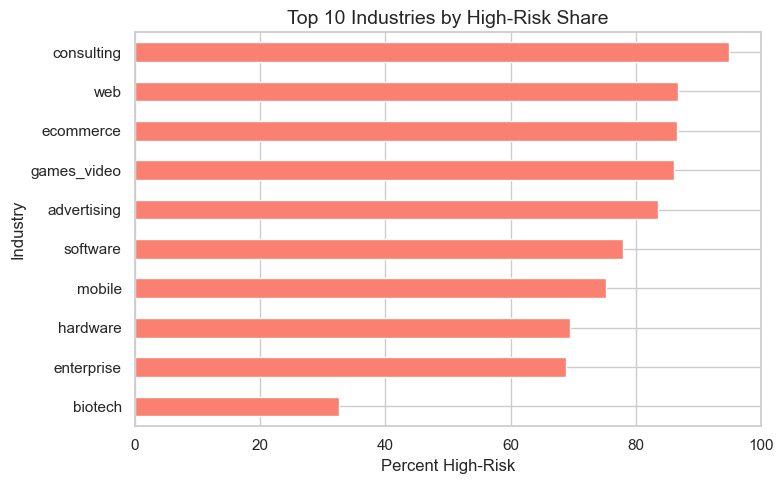

In [10]:
# Top 10 industries
top_industries = (
    df.loc[df['category_code']!='other','category_code']
      .value_counts().head(10).index
)

# Calculate % of high-risk firms per industry
pct_high = (
    pd.crosstab(df['category_code'], df['risk_tier_label'], normalize='index') * 100
).loc[top_industries]['high_risk'].sort_values(ascending=True)

# Plot
plt.figure(figsize=(8,5))
pct_high.plot(kind='barh', color='salmon')

plt.title('Top 10 Industries by High-Risk Share', fontsize=14)
plt.xlabel('Percent High-Risk')
plt.ylabel('Industry')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

Among the industries in our data, these ten have the highest share of high-risk companies.

# Top 10 High-Risk States

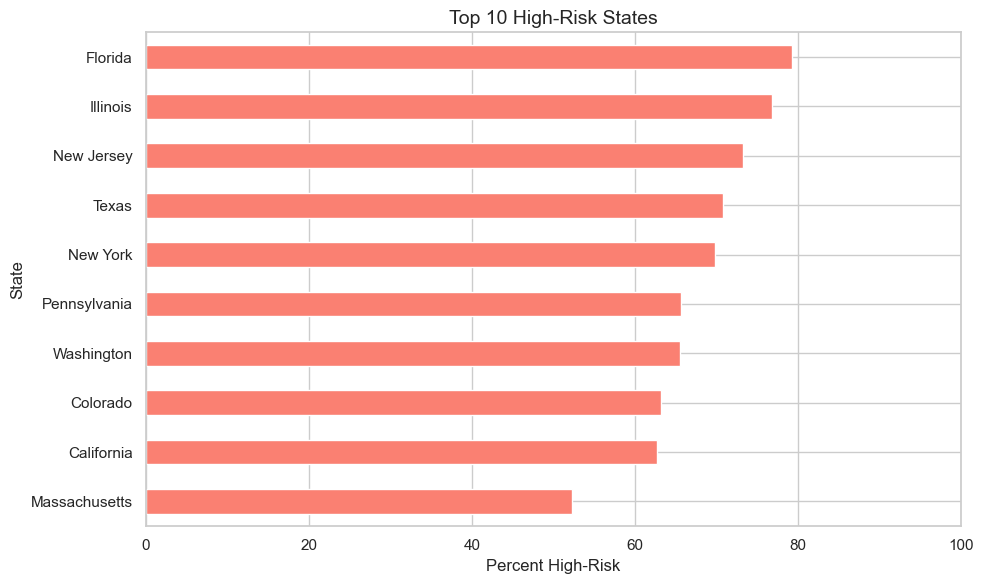

In [11]:
# keep only usa companies
df_us = df[df['country_code'] == 'usa'].copy()

# make state codes lowercase
df_us['state_code'] = df_us['state_code'].str.lower()

# convert state codes to names
state_map = {
    'fl': 'Florida',
    'il': 'Illinois',
    'nj': 'New Jersey',
    'tx': 'Texas',
    'ny': 'New York',
    'pa': 'Pennsylvania',
    'wa': 'Washington',
    'co': 'Colorado',
    'ca': 'California',
    'ma': 'Massachusetts'
}

df_us['state_label'] = df_us['state_code'].map(state_map).fillna(df_us['state_code'])

# top 10 states
top_states = df_us['state_label'].value_counts().head(10).index

#  % high-risk per top 10
pct_high_state = (
    pd.crosstab(df_us['state_label'], df_us['risk_tier_label'], normalize='index') * 100
).loc[top_states, 'high_risk'].sort_values(ascending=True)


plt.figure(figsize=(10,6))
pct_high_state.plot(kind='barh', color='salmon')

plt.title('Top 10 High-Risk States', fontsize=14)
plt.xlabel('Percent High-Risk'); plt.ylabel('State')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

Within the U.S. sample, these ten states have the highest share of high-risk companies.

# 1. Under-Capitalized Population Analysis

## Step 1: Identify Under-Capitalized Companies

```
ALGORITHM: Under-Capitalized Population Identification
1. Calculate 2% funding threshold from dataset:
   - funding_threshold_2pct = df['funding_total_usd'].quantile(0.02)
   - Display threshold value for validation

2. Create under-capitalized flag:
   - under_capitalized = (funding_total_usd <= threshold) OR (funding_total_usd.isna()) OR (funding_total_usd == 0)
   - Count total under-cap companies and calculate percentage
   - Validate against project requirement (~2% of VC funding)

3. Add under-cap analysis to existing visualizations:
   - Overlay under-cap percentages on current charts
   - Create under-cap vs well-funded comparison plots
   - Document population characteristics for ML preparation

EXPECTED OUTPUT:
- under_capitalized column added to analysis dataset
- Population count: "X,XXX companies (XX.X%)" 
- Enhanced visualizations showing under-cap focus
- Exported under-cap analysis data for ML consumption
```

In [12]:
# Calculate 2% funding threshold
funding_threshold_2pct = df['funding_total_usd'].quantile(0.02)
print(f"2% Funding Threshold: ${funding_threshold_2pct:,.2f}")

# Create under-capitalized flag
df['under_capitalized'] = (
    (df['funding_total_usd'] <= funding_threshold_2pct) | 
    (df['funding_total_usd'].isna()) | 
    (df['funding_total_usd'] == 0)
)

# Count under-capitalized companies
under_cap_count = df['under_capitalized'].sum()
under_cap_percentage = (under_cap_count / len(df)) * 100

print(f"Under-capitalized companies: {under_cap_count:,} ({under_cap_percentage:.1f}%)")

# Breakdown of under-capitalized reasons
zero_funding = (df['funding_total_usd'] == 0).sum()
missing_funding = df['funding_total_usd'].isna().sum()
below_threshold = (df['funding_total_usd'] <= funding_threshold_2pct).sum() - zero_funding

print(f"  - Zero funding: {zero_funding:,}")
print(f"  - Missing funding data: {missing_funding:,}")
print(f"  - Below 2% threshold: {below_threshold:,}")

2% Funding Threshold: $19,616.00
Under-capitalized companies: 169,216 (86.1%)
  - Zero funding: 0
  - Missing funding data: 168,657
  - Below 2% threshold: 559


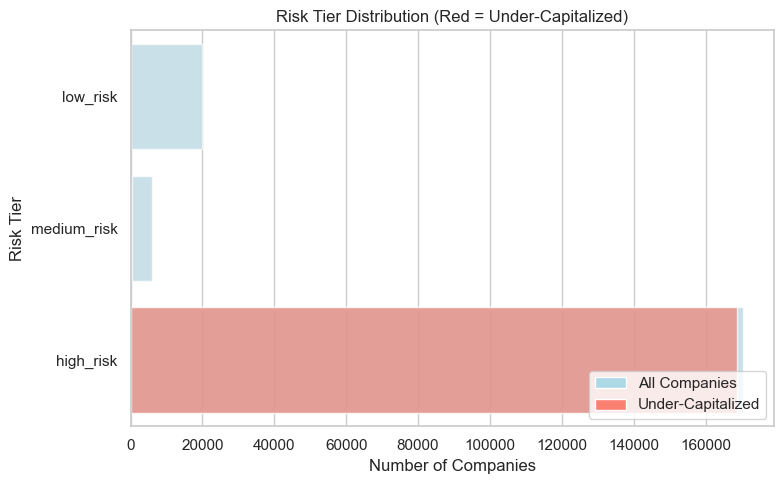

In [13]:
# Enhanced Risk Tier Distribution with under-capitalized overlay
plt.figure(figsize=(8,5))

# Plot overall risk distribution
ax = sns.countplot(y='risk_tier_label', data=df, color='lightblue', alpha=0.7)

# Overlay under-capitalized companies
under_cap_data = df[df['under_capitalized'] == True]
sns.countplot(y='risk_tier_label', data=under_cap_data, color='salmon', alpha=0.8, ax=ax)

plt.title("Risk Tier Distribution (Red = Under-Capitalized)")
plt.xlabel("Number of Companies")
plt.ylabel("Risk Tier")

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightblue', label='All Companies'),
    Patch(facecolor='salmon', label='Under-Capitalized')
]
plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

In [14]:
# Under-capitalized vs Well-funded comparison
comparison_data = df.groupby('under_capitalized').agg({
    'failure_risk': 'mean',
    'company_age_years': 'mean',
    'status': lambda x: (x == 'operating').mean()  # % still operating
}).round(3)

comparison_data.index = ['Well-Funded', 'Under-Capitalized']
print("Comparison: Under-Capitalized vs Well-Funded Companies")
print(comparison_data)

Comparison: Under-Capitalized vs Well-Funded Companies
                   failure_risk  company_age_years  status
Well-Funded               0.060             17.522   0.837
Under-Capitalized         0.998             15.423   0.949


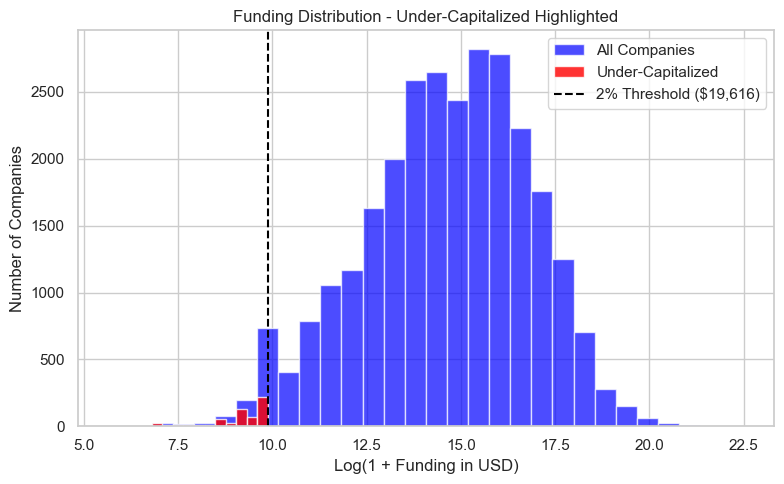

In [15]:
# Funding distribution highlighting under-capitalized
plt.figure(figsize=(8,5))

# Plot funding distribution
funding_data = df[df['funding_total_usd'] > 0]['funding_total_usd']
under_cap_funding = df[(df['under_capitalized'] == True) & (df['funding_total_usd'] > 0)]['funding_total_usd']

plt.hist(np.log1p(funding_data), bins=30, alpha=0.7, label='All Companies', color='blue')
plt.hist(np.log1p(under_cap_funding), bins=15, alpha=0.8, label='Under-Capitalized', color='red')

plt.axvline(np.log1p(funding_threshold_2pct), color='black', linestyle='--', label=f'2% Threshold (${funding_threshold_2pct:,.0f})')

plt.title("Funding Distribution - Under-Capitalized Highlighted")
plt.xlabel("Log(1 + Funding in USD)")
plt.ylabel("Number of Companies")
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
# Under-capitalized by funding stage
if 'funding_stage' in df.columns:
    under_cap_by_stage = pd.crosstab(df['funding_stage'], df['under_capitalized'], normalize='index') * 100
    print("Under-Capitalized % by Funding Stage:")
    print(under_cap_by_stage[True].round(1))

Under-Capitalized % by Funding Stage:
funding_stage
Pre-seed            5.5
Seed                0.0
Early               0.0
Growth              0.0
Late               99.7
Exit (IPO)         57.8
Exit (Acquired)    75.3
Closed             36.1
Name: True, dtype: float64


## Step 2: Geographic Under-Cap Analysis Preparation

```
ALGORITHM: Geographic Data Preparation for Future Heatmap Development
1. Create state-level under-cap aggregations:
   - Group by state_code → count under_cap companies per state
   - Calculate under_cap_density = under_cap_count / total_companies_per_state
   - Calculate state-level success rates for under_cap population
   - Prepare geographic summary statistics

2. Export geographic analysis data:
   - Save state_level_undercap_data.csv for future heatmap consumption
   - Include columns: state, total_companies, undercap_count, undercap_density, success_rate
   - Document geographic patterns for feature engineering

EXPECTED OUTPUT:
- State-level under-cap aggregation dataset exported
- Geographic pattern documentation for ML preparation
- Foundation data for future Month 3 heatmap development
- Geographic opportunity identification framework
```

In [17]:
# Filter to USA companies for geographic analysis
df_usa = df[df['country_code'] == 'usa'].copy()

# Create state-level aggregations
state_analysis = df_usa.groupby('state_code').agg(
    total_companies=('state_code', 'count'),
    undercap_count=('under_capitalized', 'sum'),
    success_count=('status', lambda x: (x.isin(['ipo', 'acquired'])).sum())
).reset_index()

# Calculate derived metrics
state_analysis['undercap_density'] = state_analysis['undercap_count'] / state_analysis['total_companies']
state_analysis['success_rate'] = state_analysis['success_count'] / state_analysis['total_companies']
state_analysis['undercap_success_rate'] = state_analysis['success_count'] / state_analysis['undercap_count']

# Handle division by zero
state_analysis['undercap_success_rate'] = state_analysis['undercap_success_rate'].replace([np.inf, -np.inf], 0)

# Sort by undercap density
state_analysis = state_analysis.sort_values('undercap_density', ascending=False)

print("Top states by under-capitalized density:")
print(state_analysis.head(10))

# Export for future heatmap development
state_analysis.to_csv('../processed_data/state_level_undercap_data.csv', index=False)
print(f"Exported state-level data: {len(state_analysis)} states")

# Document geographic patterns
high_undercap_states = state_analysis[state_analysis['undercap_density'] > 0.3]
print(f"\nStates with >30% under-capitalized density: {len(high_undercap_states)}")

# Summary statistics
print(f"\nGeographic pattern summary:")
print(f"Average under-cap density across states: {state_analysis['undercap_density'].mean():.3f}")
print(f"State with highest under-cap density: {state_analysis.iloc[0]['state_code']} ({state_analysis.iloc[0]['undercap_density']:.3f})")
print(f"State with lowest under-cap density: {state_analysis.iloc[-1]['state_code']} ({state_analysis.iloc[-1]['undercap_density']:.3f})")

Top states by under-capitalized density:
   state_code  total_companies  undercap_count  success_count  \
8          de              175             141              6   
9          fl             2149            1684            158   
3          az              755             580             70   
28         nd               30              23              3   
44    unknown              975             745            122   
33         nv              398             302             27   
14         il             1736            1316            182   
7          dc              363             273             22   
40         sc              193             145             13   
22         mi              630             467             44   

    undercap_density  success_rate  undercap_success_rate  
8           0.805714      0.034286               0.042553  
9           0.783620      0.073523               0.093824  
3           0.768212      0.092715               0.120690  
28 

# 2. Industry Sector Analysis & Data Preparation

## Step 1: Industry Under-Cap Opportunity Analysis

```
ALGORITHM: Industry-Level Under-Capitalized Analysis
1. Calculate industry under-cap concentrations:
   - Group by category_code → count under_cap companies per industry
   - Calculate industry_undercap_rate = under_cap_count / total_companies_per_industry
   - Rank industries by under-cap opportunity size
   - Identify high-potential sectors for investment focus

2. Industry success pattern analysis:
   - Calculate success rates by industry for under_cap companies
   - Compare under_cap vs well-funded success rates per industry
   - Identify industries with favorable under_cap success patterns
   - Document industry opportunity insights

3. Export industry analysis data:
   - Save industry_undercap_analysis.csv for ML consumption
   - Include: industry, total_companies, undercap_count, undercap_rate, success_rate
   - Prepare industry feature data for clustering analysis

EXPECTED OUTPUT:
- Industry-level under-cap opportunity ranking
- Success pattern analysis by sector  
- Exported industry analysis dataset for ML preparation
- Investment opportunity documentation by industry
```

Top industries by under-capitalized opportunity:
       category_code  total_companies  undercap_rate  undercap_success_rate  \
35     semiconductor              696       0.382184               0.447368   
3            biotech             4430       0.302935               0.287630   
34          security             1171       0.685739               0.108344   
14          hardware             2951       0.676042               0.106767   
31  public_relations             2846       0.876318               0.076584   
9         enterprise             4441       0.681153               0.089917   
37          software            17919       0.767063               0.077119   
25   network_hosting             2350       0.809787               0.069364   
41               web            15117       0.850169               0.055711   
19     manufacturing              679       0.519882               0.090652   

    opportunity_score  
35           0.170977  
3            0.087133  
34       

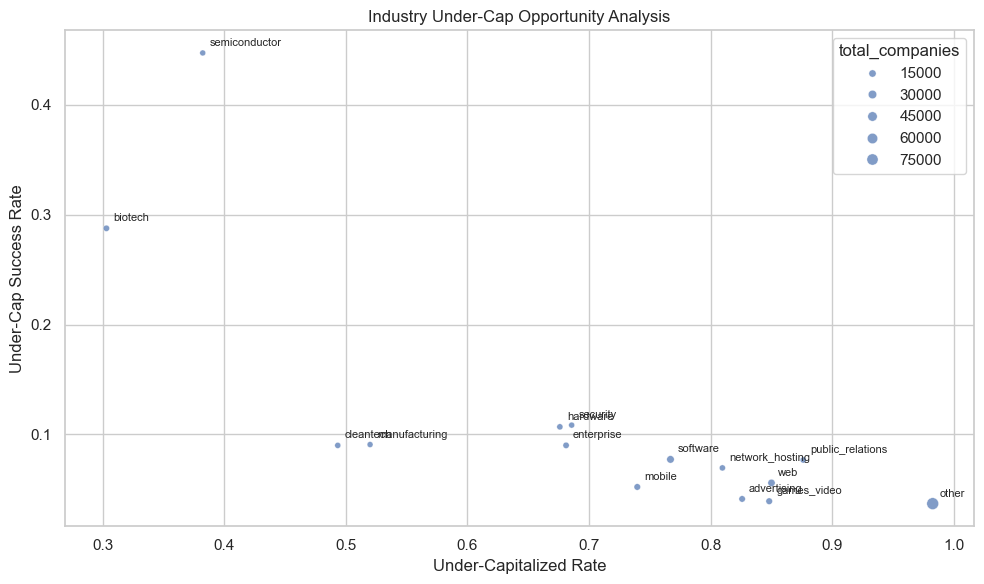

In [18]:
# Calculate industry under-cap concentrations
industry_analysis = df.groupby('category_code').agg(
    total_companies=('category_code', 'count'),
    undercap_count=('under_capitalized', 'sum'),
    success_count=('status', lambda x: (x.isin(['ipo', 'acquired'])).sum()),
    avg_failure_risk=('failure_risk', 'mean')
).reset_index()

# Calculate derived metrics
industry_analysis['undercap_rate'] = industry_analysis['undercap_count'] / industry_analysis['total_companies']
industry_analysis['success_rate'] = industry_analysis['success_count'] / industry_analysis['total_companies']

# Calculate success rates specifically for under-cap companies
undercap_success = df[df['under_capitalized'] == True].groupby('category_code').agg(
    undercap_success_count=('status', lambda x: (x.isin(['ipo', 'acquired'])).sum())
).reset_index()

# Merge under-cap success rates
industry_analysis = industry_analysis.merge(undercap_success, on='category_code', how='left')
industry_analysis['undercap_success_rate'] = industry_analysis['undercap_success_count'] / industry_analysis['undercap_count']

# Handle division by zero
industry_analysis['undercap_success_rate'] = industry_analysis['undercap_success_rate'].replace([np.inf, -np.inf], 0).fillna(0)

# Rank industries by opportunity (high under-cap rate + decent success rate)
industry_analysis['opportunity_score'] = industry_analysis['undercap_rate'] * industry_analysis['undercap_success_rate']

# Sort by opportunity score
industry_analysis = industry_analysis.sort_values('opportunity_score', ascending=False)

print("Top industries by under-capitalized opportunity:")
top_industries = industry_analysis.head(10)
print(top_industries[['category_code', 'total_companies', 'undercap_rate', 'undercap_success_rate', 'opportunity_score']])

# Export industry analysis data
industry_analysis.to_csv('../processed_data/industry_undercap_analysis.csv', index=False)
print(f"\nExported industry analysis data: {len(industry_analysis)} industries")

# Industry success pattern analysis
print(f"\nIndustry success pattern summary:")
print(f"Average under-cap rate across industries: {industry_analysis['undercap_rate'].mean():.3f}")
print(f"Average under-cap success rate: {industry_analysis['undercap_success_rate'].mean():.3f}")

# Identify high-potential sectors
high_opportunity = industry_analysis[
    (industry_analysis['undercap_rate'] > 0.3) & 
    (industry_analysis['undercap_success_rate'] > 0.1)
]
print(f"High-opportunity industries (>30% under-cap rate, >10% success): {len(high_opportunity)}")

# Visualize top industries by opportunity
plt.figure(figsize=(10, 6))
top_plot_data = industry_analysis.head(15)
sns.scatterplot(data=top_plot_data, x='undercap_rate', y='undercap_success_rate', size='total_companies', alpha=0.7)
plt.title('Industry Under-Cap Opportunity Analysis')
plt.xlabel('Under-Capitalized Rate')
plt.ylabel('Under-Cap Success Rate')

# Add industry labels
for i, row in top_plot_data.iterrows():
    plt.annotate(row['category_code'], (row['undercap_rate'], row['undercap_success_rate']), 
                 xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

## Step 2: Feature Correlation Analysis for ML Preparation

```
ALGORITHM: Feature Correlation Analysis for ML Development
1. Create correlation matrix for risk prediction features:
   - Select key features from feature engineering dataset
   - Calculate correlation with failure_risk target variable
   - Identify top predictive features for ML model development
   - Document multicollinearity issues for feature selection

2. Export ML-ready correlation data:
   - Save feature_correlations.csv with correlation rankings
   - Create feature_importance_ranking.csv for model building
   - Document feature selection recommendations
   - Prepare clustering feature sets

EXPECTED OUTPUT:
- Feature correlation matrix with target variable
- ML-ready correlation datasets exported
- Feature selection guidance for models
- Clustering feature preparation for risk personas
```

Analyzing 81 features for ML correlation...
Top 20 features correlated with failure risk:
                     feature  correlation_with_risk  abs_correlation
0                  risk_tier               0.968730         0.968730
1                has_funding              -0.960477         0.960477
2            stage_risk_mean               0.939940         0.939940
3      risk_vs_country_peers               0.905835         0.905835
4     risk_vs_industry_peers               0.899575         0.899575
5          funding_frequency              -0.854133         0.854133
6             funding_rounds              -0.748466         0.748466
7          geo_industry_risk               0.492037         0.492037
8          achievement_score              -0.467986         0.467986
9         industry_risk_mean               0.436767         0.436767
10     funding_duration_days              -0.433460         0.433460
11         country_risk_mean               0.423630         0.423630
12     experi

C:\Users\emily\AppData\Local\Temp\ipykernel_19964\278344941.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='correlation_with_risk', y='feature', palette=colors)


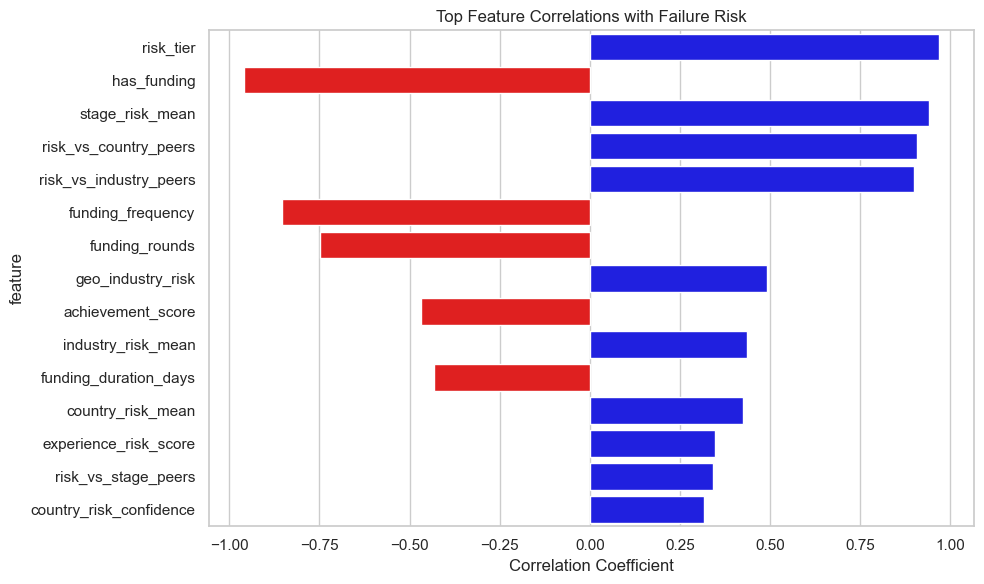

In [19]:
# Select numeric features for correlation analysis
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove non-predictive columns
exclude_features = ['failure_risk']  # Keep target for correlation
ml_features = [f for f in numeric_features if f not in exclude_features]

print(f"Analyzing {len(ml_features)} features for ML correlation...")

# Calculate correlation with failure_risk target
correlation_with_target = df[ml_features + ['failure_risk']].corr()['failure_risk'].drop('failure_risk')
correlation_with_target = correlation_with_target.sort_values(key=abs, ascending=False)

# Create feature correlation dataset
feature_correlations = pd.DataFrame({
    'feature': correlation_with_target.index,
    'correlation_with_risk': correlation_with_target.values,
    'abs_correlation': abs(correlation_with_target.values)
}).sort_values('abs_correlation', ascending=False)

print("Top 20 features correlated with failure risk:")
print(feature_correlations.head(20))

# Export correlation data
feature_correlations.to_csv('../processed_data/feature_correlations.csv', index=False)
print(f"\nExported feature correlations: {len(feature_correlations)} features")

# Create feature importance ranking
feature_importance = feature_correlations[['feature', 'abs_correlation']].copy()
feature_importance['importance_rank'] = range(1, len(feature_importance) + 1)
feature_importance.to_csv('../processed_data/feature_importance_ranking.csv', index=False)

# Multicollinearity analysis
correlation_matrix = df[ml_features].corr().abs()

# Find highly correlated feature pairs
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > 0.8:
            high_corr_pairs.append({
                'feature_1': correlation_matrix.columns[i],
                'feature_2': correlation_matrix.columns[j], 
                'correlation': correlation_matrix.iloc[i, j]
            })

high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('correlation', ascending=False)
print(f"\nHighly correlated feature pairs (>0.8): {len(high_corr_pairs)}")

# Feature selection recommendations
strong_predictors = feature_correlations[feature_correlations['abs_correlation'] > 0.1]
weak_predictors = feature_correlations[feature_correlations['abs_correlation'] < 0.05]

print(f"\nFeature selection summary:")
print(f"Strong predictors (|corr| > 0.1): {len(strong_predictors)} features")
print(f"Weak predictors (|corr| < 0.05): {len(weak_predictors)} features")

# Prepare clustering feature sets
clustering_features = strong_predictors.head(15)['feature'].tolist()
print(f"\nRecommended clustering features ({len(clustering_features)}):")
print(clustering_features)

# Visualize top feature correlations
plt.figure(figsize=(10, 6))
top_features = feature_correlations.head(15)
colors = ['red' if x < 0 else 'blue' for x in top_features['correlation_with_risk']]
sns.barplot(data=top_features, x='correlation_with_risk', y='feature', palette=colors)
plt.title('Top Feature Correlations with Failure Risk')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

# 3. Risk Analysis Enhancement & ML Preparation

## Step 1: Enhanced Risk Distribution Analysis

```
ALGORITHM: Risk Tier Analysis with Under-Capitalized Focus
1. Enhance existing risk visualizations:
   - Add under-cap overlay to risk tier distribution charts
   - Calculate risk distribution within under-cap population
   - Compare risk patterns: under-cap vs well-funded companies
   - Document risk pattern differences for ML feature engineering

2. Create risk-geographic cross-analysis:
   - Calculate risk distribution by state for under-cap companies
   - Identify geographic risk pattern variations
   - Prepare state-risk analysis bias detection
   - Export geographic-risk datasets for ML preparation

3. Export enhanced risk analysis data:
   - Save risk_analysis_enhanced.csv with under-cap focus
   - Include geographic risk patterns for bias analysis
   - Prepare risk feature data for ML models

EXPECTED OUTPUT:
- Enhanced risk visualizations with under-cap focus
- Geographic risk pattern analysis
- Exported risk datasets for ML development
- Bias detection preparation data
```

<Figure size 1000x600 with 0 Axes>

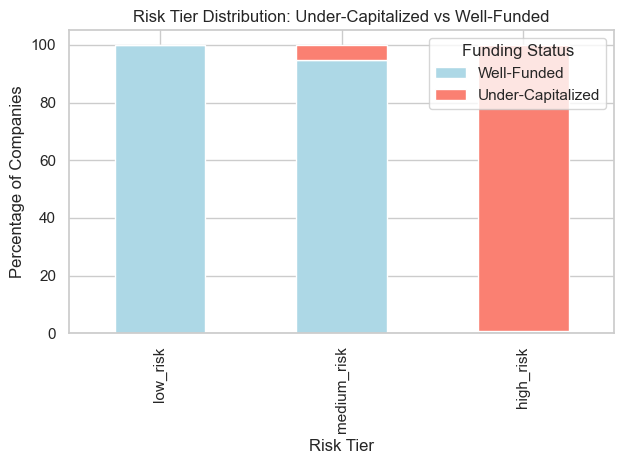

Risk Distribution Comparison:

Under-Capitalized Companies:
risk_tier_label
high_risk      99.802028
medium_risk     0.190289
low_risk        0.007682
Name: proportion, dtype: float64

Well-Funded Companies:
risk_tier_label
low_risk       73.087062
medium_risk    20.872080
high_risk       6.040858
Name: proportion, dtype: float64

Top states by high-risk under-cap companies:
   state_code  total_undercap  high_risk_percentage  avg_failure_risk
0          ak              12                 100.0               1.0
1          al             125                 100.0               1.0
2          ar              61                 100.0               1.0
6          ct             322                 100.0               1.0
16         ks             124                 100.0               1.0
8          de             147                 100.0               1.0
11         hi              52                 100.0               1.0
13         id              66                 100.0           

C:\Users\emily\AppData\Local\Temp\ipykernel_19964\2722156715.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  enhanced_risk_data = df.groupby(['risk_tier_label', 'under_capitalized']).agg(


High-risk under-cap rate: 99.0%
Low-risk under-cap rate: 0.1%

Risk pattern differences:
                  failure_risk        company_age_years funding_total_usd
                          mean    std              mean              mean
under_capitalized                                                        
False                    0.060  0.238            17.522      1.512006e+07
True                     0.998  0.044            15.423      1.153010e+04


In [20]:
# Enhanced risk tier distribution with under-cap focus
plt.figure(figsize=(10, 6))

# Calculate percentages for stacked bar chart
risk_undercap = pd.crosstab(df['risk_tier_label'], df['under_capitalized'], normalize='index') * 100
risk_undercap.columns = ['Well-Funded', 'Under-Capitalized']

# Create stacked bar chart
risk_undercap.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Risk Tier Distribution: Under-Capitalized vs Well-Funded')
plt.xlabel('Risk Tier')
plt.ylabel('Percentage of Companies')
plt.legend(title='Funding Status')
plt.tight_layout()
plt.show()

# Risk distribution within under-cap population
under_cap_risk = df[df['under_capitalized'] == True]['risk_tier_label'].value_counts(normalize=True) * 100
well_funded_risk = df[df['under_capitalized'] == False]['risk_tier_label'].value_counts(normalize=True) * 100

print("Risk Distribution Comparison:")
print("\nUnder-Capitalized Companies:")
print(under_cap_risk)
print("\nWell-Funded Companies:")
print(well_funded_risk)

# Risk-geographic cross-analysis for under-cap companies
if 'state_code' in df.columns:
    state_risk_analysis = df[df['under_capitalized'] == True].groupby('state_code').agg(
        total_undercap=('state_code', 'count'),
        high_risk_percentage=('risk_tier_label', lambda x: (x == 'high_risk').mean() * 100),
        avg_failure_risk=('failure_risk', 'mean')
    ).reset_index()
    
    state_risk_analysis = state_risk_analysis.sort_values('high_risk_percentage', ascending=False)
    
    print(f"\nTop states by high-risk under-cap companies:")
    print(state_risk_analysis.head(10))

# Create enhanced risk analysis dataset
enhanced_risk_data = df.groupby(['risk_tier_label', 'under_capitalized']).agg(
    count=('risk_tier_label', 'count'),
    avg_failure_risk=('failure_risk', 'mean'),
    success_rate=('status', lambda x: (x.isin(['ipo', 'acquired'])).mean() * 100),
    avg_company_age=('company_age_years', 'mean')
).reset_index()

# Add geographic risk patterns if state data available
if 'state_code' in df.columns:
    state_risk_patterns = df.groupby('state_code').agg(
        state_risk_bias=('failure_risk', 'mean'),
        state_undercap_rate=('under_capitalized', 'mean')
    ).reset_index()
    
    enhanced_risk_data = enhanced_risk_data.merge(
        state_risk_patterns, how='cross'
    )

# Export enhanced risk analysis data
enhanced_risk_data.to_csv('../processed_data/risk_analysis_enhanced.csv', index=False)
print(f"\nExported enhanced risk analysis: {len(enhanced_risk_data)} records")

# Bias detection preparation
print(f"\nBias detection summary:")
print(f"Overall under-cap rate: {df['under_capitalized'].mean()*100:.1f}%")
print(f"High-risk under-cap rate: {(df[df['risk_tier_label'] == 'high_risk']['under_capitalized'].mean())*100:.1f}%")
print(f"Low-risk under-cap rate: {(df[df['risk_tier_label'] == 'low_risk']['under_capitalized'].mean())*100:.1f}%")

# Risk pattern differences for ML features
risk_patterns = df.groupby('under_capitalized').agg({
    'failure_risk': ['mean', 'std'],
    'company_age_years': 'mean',
    'funding_total_usd': 'mean'
}).round(3)

print(f"\nRisk pattern differences:")
print(risk_patterns)

## Step 2: Clustering Data Preparation

```
ALGORITHM: Risk Profile Clustering Data Preparation
1. Prepare clustering-ready feature sets:
   - Select normalized features for risk profile clustering
   - Create standardized feature matrix for unsupervised learning
   - Document feature selection rationale for clustering
   - Validate feature completeness and quality

2. Export clustering preparation data:
   - Save clustering_features_ready.csv for ML phase
   - Include feature correlation matrix for cluster validation
   - Document clustering methodology recommendations
   - Prepare cluster validation datasets

EXPECTED OUTPUT:
- Clustering-ready feature dataset exported
- Feature selection documentation for ML team
- Clustering methodology guidance
- Validation dataset preparation
```

In [21]:
# Select features for clustering based on correlation analysis
clustering_features = [
    'failure_risk', 'company_age_years', 'funding_total_usd',
    'under_capitalized', 'employee_count', 'investor_count'
]

# Add any additional relevant features from correlation analysis
additional_features = [
    'has_email', 'has_phone', 'has_description',
    'funding_rounds', 'avg_funding_per_round'
]

# Combine features and check availability
available_features = [f for f in clustering_features + additional_features if f in df.columns]
print(f"Selected {len(available_features)} features for clustering:")

# Create clustering-ready dataset
clustering_data = df[available_features].copy()

# Handle missing values
missing_before = clustering_data.isnull().sum()
print(f"\nMissing values before processing:")
for feature, missing in missing_before[missing_before > 0].items():
    print(f"  {feature}: {missing} missing ({missing/len(clustering_data)*100:.1f}%)")

# Fill missing values with median for numeric, mode for categorical
for column in clustering_data.columns:
    if clustering_data[column].dtype in ['float64', 'int64']:
        clustering_data[column] = clustering_data[column].fillna(clustering_data[column].median())
    else:
        clustering_data[column] = clustering_data[column].fillna(clustering_data[column].mode()[0])

print(f"\nMissing values after processing: {clustering_data.isnull().sum().sum()}")

# Feature standardization preparation
from sklearn.preprocessing import StandardScaler

# Select numeric features for standardization
numeric_features = clustering_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(f"\nNumeric features for standardization: {len(numeric_features)}")

# Create standardized version
scaler = StandardScaler()
clustering_data_standardized = clustering_data.copy()
clustering_data_standardized[numeric_features] = scaler.fit_transform(clustering_data[numeric_features])

# Export clustering datasets
clustering_data.to_csv('../processed_data/clustering_features_ready.csv', index=False)
clustering_data_standardized.to_csv('../processed_data/clustering_features_standardized.csv', index=False)

print(f"\nExported clustering datasets:")
print(f"  - Original features: {len(clustering_data)} rows, {len(clustering_data.columns)} columns")
print(f"  - Standardized features: {len(clustering_data_standardized)} rows, {len(clustering_data_standardized.columns)} columns")

# Feature correlation matrix for cluster validation
correlation_matrix = clustering_data.corr()
print(f"\nFeature correlation matrix shape: {correlation_matrix.shape}")

# Export correlation matrix
correlation_matrix.to_csv('../processed_data/clustering_feature_correlations.csv')
print("Exported feature correlation matrix")

# Clustering methodology documentation
print(f"\nClustering Methodology Recommendations:")
print(f"1. Feature set: {len(available_features)} features selected")
print(f"2. Data points: {len(clustering_data)} companies")
print(f"3. Recommended algorithms: K-means, DBSCAN, Gaussian Mixture Models")
print(f"4. Validation metrics: Silhouette score, Calinski-Harabasz index")
print(f"5. Expected clusters: 3-5 risk profile segments")

# Prepare cluster validation datasets
validation_features = ['failure_risk', 'under_capitalized', 'company_age_years']
validation_data = df[validation_features].copy()
validation_data.to_csv('../processed_data/cluster_validation_dataset.csv', index=False)

print(f"\nCluster validation dataset prepared: {len(validation_data)} records")
print(f"Validation features: {validation_features}")

# Feature selection rationale
print(f"\nFeature Selection Rationale:")
for feature in available_features:
    feature_type = 'numeric' if feature in numeric_features else 'categorical'
    print(f"  - {feature}: {feature_type} feature for risk profiling")

Selected 6 features for clustering:

Missing values before processing:
  funding_total_usd: 168657 missing (85.8%)

Missing values after processing: 0

Numeric features for standardization: 5

Exported clustering datasets:
  - Original features: 196530 rows, 6 columns
  - Standardized features: 196530 rows, 6 columns

Feature correlation matrix shape: (6, 6)
Exported feature correlation matrix

Clustering Methodology Recommendations:
1. Feature set: 6 features selected
2. Data points: 196530 companies
3. Recommended algorithms: K-means, DBSCAN, Gaussian Mixture Models
4. Validation metrics: Silhouette score, Calinski-Harabasz index
5. Expected clusters: 3-5 risk profile segments

Cluster validation dataset prepared: 196530 records
Validation features: ['failure_risk', 'under_capitalized', 'company_age_years']

Feature Selection Rationale:
  - failure_risk: numeric feature for risk profiling
  - company_age_years: numeric feature for risk profiling
  - funding_total_usd: numeric feature

# 4. Business Intelligence Data Export for

## Step 1: Investment Analysis Data Preparation

```
ALGORITHM: Investment Opportunity Data Export
1. Create investment candidate dataset:
   - Filter companies meeting basic investment criteria
   - Calculate investment attractiveness scores using current features
   - Rank companies by under-cap investment potential
   - Document investment screening methodology

2. Prepare sector opportunity analysis:
   - Export industry-level investment metrics
   - Include under-cap concentration by sector
   - Calculate sector growth indicators from temporal data
   - Prepare sector recommendation framework

3. Export investment analysis datasets:
   - Save investment_candidates_analysis.csv for consumption
   - Include sector_opportunity_matrix.csv
   - Document investment methodology for ML enhancement

EXPECTED OUTPUT:
- Investment candidate dataset exported
- Sector opportunity analysis prepared
- Investment methodology documentation
- ML enhancement framework
```

## Step 2: Bias Detection Data Preparation

```
ALGORITHM: Bias Analysis Dataset Creation
1. Geographic bias data preparation:
   - Calculate success rates by state/region for bias analysis
   - Identify potential geographic discrimination patterns
   - Prepare geographic fairness assessment data
   - Document bias detection methodology

2. Industry bias data preparation:
   - Calculate success rates by industry sector
   - Identify potential industry bias patterns
   - Prepare sector fairness assessment data
   - Export bias detection datasets

3. Temporal bias data preparation:
   - Analyze success patterns by founding era
   - Identify temporal discrimination patterns
   - Prepare era-based fairness data

EXPECTED OUTPUT:
- Geographic bias analysis dataset
- Industry bias detection data
- Temporal bias assessment preparation
- Fairness evaluation framework
```

## 5. Data Quality & Validation

## Step 1: ML-Ready Dataset Validation

```
ALGORITHM: Dataset Validation for ML Development
1. Validate dataset completeness for ML models:
   - Check feature completeness across all engineered features
   - Validate target variable quality (risk_tier, failure_risk)
   - Assess under-cap population representation
   - Document data quality metrics for ML team

2. Create ML handoff documentation:
   - Feature dictionary with descriptions and data types
   - Target variable definitions and distributions
   - Data quality report with missing value patterns
   - Bias assessment preliminary findings

3. Export final analysis datasets:
   - Save ml_ready_dataset.csv with complete feature set
   - Include data_quality_report.csv for ML validation
   - Export feature_dictionary.csv for ML team reference

EXPECTED OUTPUT:
- ML-ready dataset with complete validation
- Comprehensive data quality documentation
- Feature dictionary for development
- Handoff package for ML model building
```

## Step 2: Key Insights Documentation for Stakeholders

```
ALGORITHM: Business Insights Documentation
1. Executive summary creation:
   - Under-cap population insights and opportunities
   - Geographic investment opportunity identification
   - Industry sector recommendation summaries
   - Risk pattern business implications

2. Quantified insights preparation:
   - Success rate differentials with confidence intervals
   - Geographic opportunity rankings with supporting data
   - Industry investment potential with risk assessments
   - ROI projection foundations based on current analysis

3. Stakeholder presentation data:
   - Key metric summaries for executive reporting
   - Geographic heatmap data preparation for future visualization
   - Investment recommendation framework foundations
   - Risk assessment business case development

EXPECTED OUTPUT:
- Executive insights summary document
- Quantified business recommendations
- Stakeholder presentation datasets
- Investment decision support framework
```

# 6. Month 3 Foundation Setup (Future Preparation)

## Step 1: Dashboard Data Infrastructure Preparation

```
ALGORITHM: Month 3 Dashboard Data Foundation
1. Create dashboard-ready data aggregations:
   - State-level aggregations for future heatmap consumption
   - Industry-level summaries for sector analysis dashboards  
   - Risk profile summaries for persona development
   - Under-cap analysis summaries for population dashboards

2. Export structured data for dashboard development:
   - Save state_dashboard_data.csv for geographic visualization
   - Export industry_dashboard_data.csv for sector analysis
   - Create risk_dashboard_data.csv for risk profile components
   - Include undercap_dashboard_data.csv for population analysis

3. Document dashboard data requirements:
   - Data structure specifications for interactive components
   - Update frequency requirements and data refresh procedures
   - Performance optimization recommendations for large datasets
   - Integration requirements with ML model outputs

EXPECTED OUTPUT:
- Dashboard-ready aggregated datasets exported
- Data structure documentation for Month 3 development
- Performance optimization framework
- ML integration preparation guidelines
```

Step 2: Visualization Framework Preparation

```
ALGORITHM: Interactive Visualization Data Preparation
1. Prepare geographic visualization data:
   - State boundary data requirements documentation
   - Coordinate system specifications for mapping
   - Heatmap color scale data preparation
   - Geographic drill-down data structure setup

2. Prepare analysis visualization data:
   - Time series data for trend analysis components
   - Comparative analysis datasets for population comparisons
   - Correlation matrix data for feature relationship visualization
   - Investment opportunity scoring data for recommendation interfaces

EXPECTED OUTPUT:
- Geographic visualization data prepared
- Analysis component data structured
- Visualization framework documentation
- Interactive component data requirements specified
```